In [ ]:
# Install the necessary packages
!pip install -r ../requirements.txt

In [ ]:
start = "2024-01-01"
end = "2024-01-31"
interval = "1m"

In [ ]:
from modules.data_services.data_pipeline import load_pair, calculate_zscore

# 1. Load data
tickers = ["ADAUSDT", "BTCUSDT"]

pair = load_pair(
    x="ADAUSDT",
    y="BTCUSDT",
    start=start,
    end=end,
    interval=interval,
)
calculate_zscore(pair)
print(pair.data)

In [ ]:
from modules.performance.strategy import generate_action_space

entry_threshold = 2
exit_threshold = 0

generate_action_space(
    pair_data=pair,
    entry_threshold=entry_threshold,  # jeśli dodamy do df'a kolumny entry_threshold i exit_threshold to możemy
    exit_threshold=exit_threshold,  # nie definiować tych wartości w funkcji - wtedy thresholdy będą dynamiczne
    position_size=1  # podobnie jak w przypadku thresholdów możemy dodać kolumnę
)  # position_size aby uzyskać dynamiczne proporcje alokacji
print(pair.data.head())  # position_size = 1 => longX 50%, shortY 50% (longLeg 100%)

In [ ]:
from modules.visualization.plots import plot_zscore_with_thresholds

plot_zscore_with_thresholds(pair)

In [ ]:
from modules.performance.strategy import benchmark_strategy

initial_cash = 100000

benchmark_strategy(
    pair_data=pair,
    initial_cash=initial_cash,
    fee_rate=0.0005
)
print(pair.data)

In [ ]:
from modules.visualization.plots import plot_pnl_and_positions

plot_pnl_and_positions(pair)

In [ ]:
from modules.performance.strategy import calculate_stats

stats = calculate_stats(pair)
print(stats)

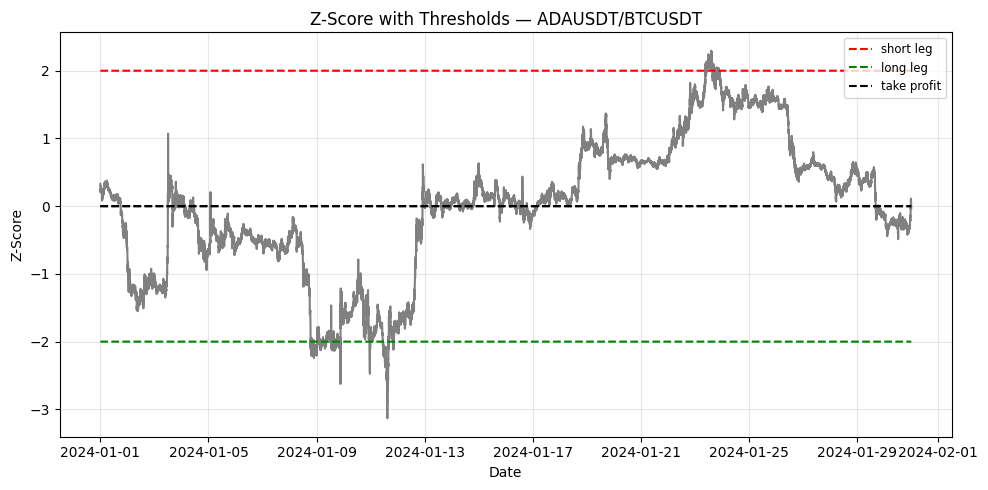

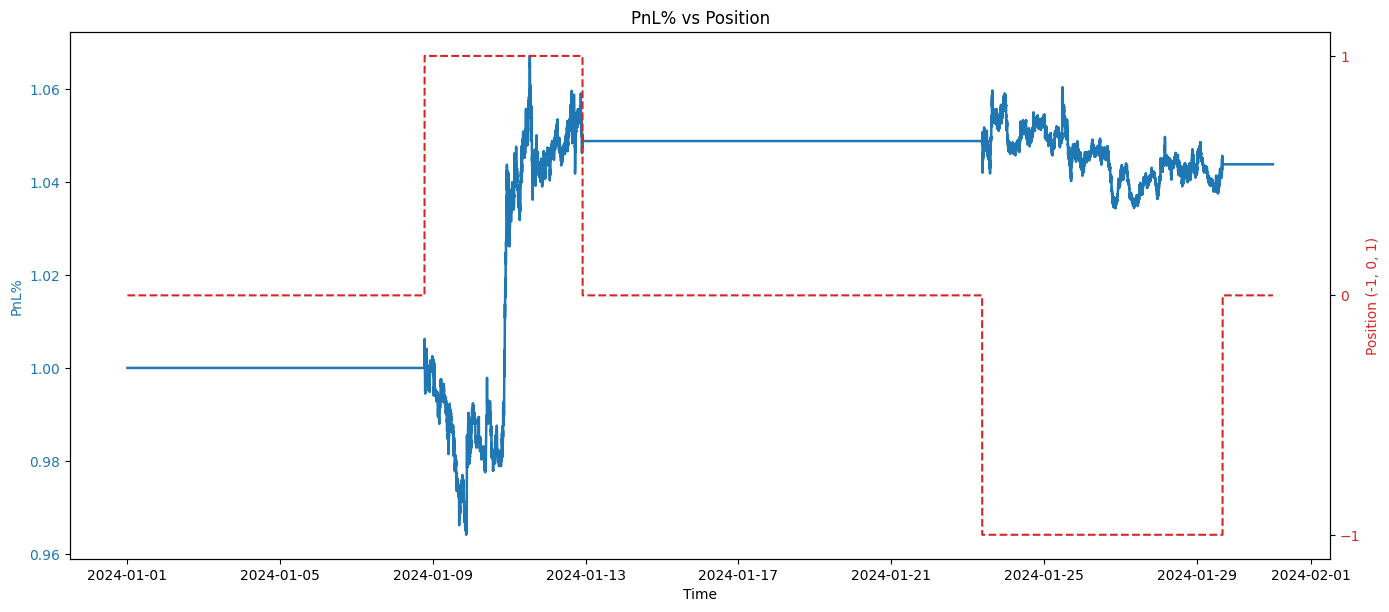

{'total_return_brutto': 4.3757837338821215, 'sharpe_brutto': 2.630326721803725, 'std_brutto': 0.00028438328998186586, 'max_drawdown_brutto': -4.182733298543338, 'total_return_netto': 4.273346078726026, 'sharpe_netto': 2.5707339858102918, 'std_netto': 0.0002845816628133872, 'max_drawdown_netto': -4.184812738023341}
[PairData(x='ADAUSDT', y='BTCUSDT', start='2024-01-01', end='2024-01-31', interval='1m', data=                     ADAUSDT   BTCUSDT      spread   z_score  entry_threshold  \
open_time                                                                       
2024-01-01 00:00:00   0.5940  42298.61 -42298.0160  0.329324                2   
2024-01-01 00:01:00   0.5947  42320.00 -42319.4053  0.318079                2   
2024-01-01 00:02:00   0.5948  42325.50 -42324.9052  0.315188                2   
2024-01-01 00:03:00   0.5960  42367.99 -42367.3940  0.292849                2   
2024-01-01 00:04:00   0.5971  42397.23 -42396.6329  0.277477                2   
...                    

In [4]:
from modules.data_services.data_models import PortfolioData
from modules.performance.strategy import perform_pair_trading_strategy

start = "2024-01-01"
end = "2024-01-31"
interval = "1m"
x = "ADAUSDT"
y = "BTCUSDT"
entry_threshold = 2
exit_threshold = 0
position_size = 1
initial_cash = 100000
fee_rate = 0.0005

portfolio = PortfolioData
portfolio.performance = []
perform_pair_trading_strategy(portfolio, x, y, start, end, interval, entry_threshold, exit_threshold, position_size,
                              initial_cash, fee_rate)
print(portfolio.performance)